In [1]:
import numpy as np
# 导入训练集
data=np.loadtxt('mnist_train.csv',delimiter=',')

In [10]:
feature=data[:,1:]
label=data[:,0:1].astype(int)

# 对label进行独热编码后的数据 one hot encoding
Label=np.eye(10)[label.T[0]]

# bias的一列
bias=np.ones((len(feature),1))

# 拼装Feature，数据归一化 并且拼接上一列1
Feature=np.hstack((feature/255.0,bias)) 

# 要梯度下降更新的权重：785个数据，m1 m2 m3  ... m784 b
# 10种类别，0,1,2,3,4,5,6,7,8,9
Weight=np.ones((785,10))
#记录mse对m和b变化率的惯性
m=np.zeros((785,10))
#记录mse对m和b变化率的速度
v=np.zeros((785,10))
learningrate = 0.001

def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradentdecent():
    global Weight,m,v
    #计算的是m和b的梯度
    slop=np.dot(Feature.T,(sigmoid(np.dot(Feature,Weight))-Label))
    #核心逻辑，Adam    
    beta_1=0.9
    beta_2=0.999    
    m=beta_1*m+(1-beta_1)*slop
    v=beta_2*v+(1-beta_2)*(slop**2)    
    m_p=m/(1-beta_1)
    v_p=v/(1-beta_2)    
    Weight=Weight-learningrate*m_p/np.sqrt(v_p+0.000000001)
    
    ## 统计数据，交叉熵计算出来
    # 真实的概率
    actual=Label
    # 预测概率
    guess=np.exp((np.dot(Feature,Weight)))/np.sum(np.exp(np.dot(Feature,Weight)),axis=1).reshape(-1,1)
    # 计算交叉熵
    crossentropy=-np.sum(actual*np.log(guess+0.000000001)+(1-actual)*np.log(1-guess+0.000000001))
    # mse可以代替交叉熵来评估变化率
    mse=np.sum(np.square(guess-actual))
    
    return slop,crossentropy,mse


In [11]:
#for i in range(100000):
slop,crossentropy,mse=gradentdecent()
    #totalslop=np.sum(np.square(slop))
    #if totalslop<50:
print("mse={},crossentropy={}".format(mse,crossentropy))
        #break

mse=53999.990250432755,crossentropy=195049.72869405398


In [12]:
slop,crossentropy,mse=gradentdecent()
print("mse={},crossentropy={}".format(mse,crossentropy))

mse=53999.97713549603,crossentropy=195049.65593868378


In [13]:
for i in range(10000):
    slop,crossentropy,mse=gradentdecent()
    #totalslop=np.sum(np.square(slop))
    #if totalslop<50:
    if i%500==0:
        print("mse={},crossentropy={}".format(mse,crossentropy))
        #break

mse=53999.96183932099,crossentropy=195049.5711895895
mse=53995.24328666428,crossentropy=195027.53591557048
mse=53992.12955210024,crossentropy=195015.85628113968
mse=53988.48062963307,crossentropy=195003.72643360385
mse=53672.51078677837,crossentropy=193329.75947179206
mse=41069.934398377336,crossentropy=144154.44468746302


KeyboardInterrupt: 

In [14]:
i

2508

In [16]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)
Weight

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        

In [17]:
a=np.loadtxt('mnist_test.csv',delimiter=',')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


<IPython.core.display.Javascript object>


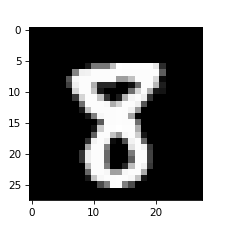

In [32]:
testfeature=a[:1000,1:]
j=128
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure(figsize=(3,3),dpi=50)
plt.imshow(testfeature[j].reshape(28,28),cmap='gray')
plt.show()

# 用我们的模型开始预测

In [33]:
ones=np.ones((len(testfeature),1))
testFeature=np.hstack((testfeature/255.0,ones))
testFeature[j].reshape(1,-1).shape
np.exp((np.dot(testFeature[j].reshape(1,-1),Weight)))/np.sum(np.exp((np.dot(testFeature[j].reshape(1,-1),Weight))))

array([[0.0608378 , 0.07000926, 0.07489526, 0.11893375, 0.08685442,
        0.09382252, 0.05748256, 0.12043761, 0.18788948, 0.12883732]])

In [21]:
Weight.shape

(785, 10)

In [37]:
np.argmax(np.exp(np.dot(testFeature[j].reshape(1,-1),Weight))/np.sum(np.exp(np.dot(testFeature[j].reshape(1,-1),Weight))))

8

## 保存模型

In [38]:
np.savetxt('model.txt',Weight)

In [39]:
np.savetxt('model.csv',Weight,delimiter=',')

# mini-batch梯度下降

In [40]:
import numpy as np
# 导入训练集
data=np.loadtxt('mnist_train.csv',delimiter=',')

In [41]:
feature=data[:,1:]
label=data[:,0:1].astype(int)

# 对label进行独热编码后的数据 one hot encoding
Label=np.eye(10)[label.T[0]]

# bias的一列
bias=np.ones((len(feature),1))

# 拼装Feature，数据归一化 并且拼接上一列1
Feature=np.hstack((feature/255.0,bias)) 

# 要梯度下降更新的权重：785个数据，m1 m2 m3  ... m784 b
# 10种类别，0,1,2,3,4,5,6,7,8,9
Weight=np.ones((785,10))
#记录mse对m和b变化率的惯性
m=np.zeros((785,10))
#记录mse对m和b变化率的速度
v=np.zeros((785,10))
learningrate = 0.01


In [42]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradentdecent():
    global Weight,m,v
    #把全部6万条数据拆分成100份，每份600条数据
    for i in range(0,100):
        #计算的是m和b的梯度
        slop=np.dot(Feature[i*600:(i+1)*600].T,(sigmoid(np.dot(Feature[i*600:(i+1)*600],Weight))-Label[i*600:(i+1)*600]))
        #核心逻辑，Adam    
        beta_1=0.9
        beta_2=0.999    
        m=beta_1*m+(1-beta_1)*slop
        v=beta_2*v+(1-beta_2)*(slop**2)    
        m_p=m/(1-beta_1)
        v_p=v/(1-beta_2)    
        Weight=Weight-learningrate*m_p/np.sqrt(v_p+0.000000001)

    ## 统计数据，交叉熵计算出来
    # 真实的概率
    actual=Label
    # 预测概率
    guess=np.exp((np.dot(Feature,Weight)))/np.sum(np.exp(np.dot(Feature,Weight)),axis=1).reshape(-1,1)
    # 计算交叉熵
    crossentropy=-np.sum(actual*np.log(guess+0.000000001)+(1-actual)*np.log(1-guess+0.000000001))
    # mse可以代替交叉熵来评估变化率
    mse=np.sum(np.square(guess-actual))
    
    return slop,crossentropy,mse

In [43]:
for i in range(300):
    slop,crossentropy,mse=gradentdecent()
    if i%100==0:
        print("mse={},crossentropy={}".format(mse,crossentropy))

mse=34425.2583010728,crossentropy=122279.21382708923
mse=6656.556669536849,crossentropy=27410.829397448924
mse=6473.062108764962,crossentropy=26818.987129024783


In [44]:
np.savetxt('modelmini.txt',Weight)